# Evaluating prediction performance

In [1]:
library(ROCR)
library(PRROC)
library(magrittr)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



## Read results

In [2]:
results = readr::read_tsv("pred_res_for_roc.tsv")

Parsed with column specification:
cols(
  chemical_id = col_character(),
  disease_id = col_character(),
  origin = col_character(),
  prior_logit = col_double(),
  prior_prob = col_double(),
  degree_CbG = col_double(),
  degree_DaG = col_double(),
  dwpc_CbGaD = col_double(),
  dwpc_CbGaDaGaD = col_double(),
  dwpc_CbGbCbGaD = col_double(),
  dwpc_CbGbCtD = col_double(),
  dwpc_CtDtCtD = col_double(),
  predicted_value = col_double(),
  category = col_character(),
  true_label = col_integer()
)


In [3]:
dim(results)

[1] 16709    15

In [4]:
head(results)

chemical_id,disease_id,origin,prior_logit,prior_prob,degree_CbG,degree_DaG,dwpc_CbGaD,dwpc_CbGaDaGaD,dwpc_CbGbCbGaD,dwpc_CbGbCtD,dwpc_CtDtCtD,predicted_value,category,true_label
DB00884,DOID:11476,holdout,-3.825,0.021360,-1.4200,0.2483,3.8660,-0.2986,-0.6473,4.639,5.4620,0.7381946,DM,1
DB01583,DOID:1459,holdout,-Inf,0.000000,0.8967,-0.5354,4.7880,-0.2269,3.3190,5.652,-0.2954,0.5862281,DM,1
DB00399,DOID:11476,holdout,-3.094,0.043370,-0.2547,0.2483,3.6380,-0.9471,-0.1689,3.886,4.6370,0.5706117,NA,0
DB00630,DOID:5408,holdout,-4.845,0.007803,-0.4542,-1.5250,-0.5141,-0.8001,-1.0140,5.611,5.0000,0.5702399,DM,1
DB00958,DOID:11054,holdout,-2.140,0.105300,0.7578,0.4546,4.3490,2.5150,3.2220,3.779,4.3680,0.5274253,NA,0
DB00515,DOID:11054,holdout,-2.140,0.105300,1.3250,0.4546,4.1380,2.5490,3.3990,3.909,4.6330,0.5258151,NA,0


---

## ROC curve

In [5]:
good <- subset(results, true_label == 1)$predicted_value
bad <- subset(results, true_label == 0)$predicted_value

In [6]:
roc <- roc.curve(scores.class0 = good, scores.class1 = bad, curve = T)

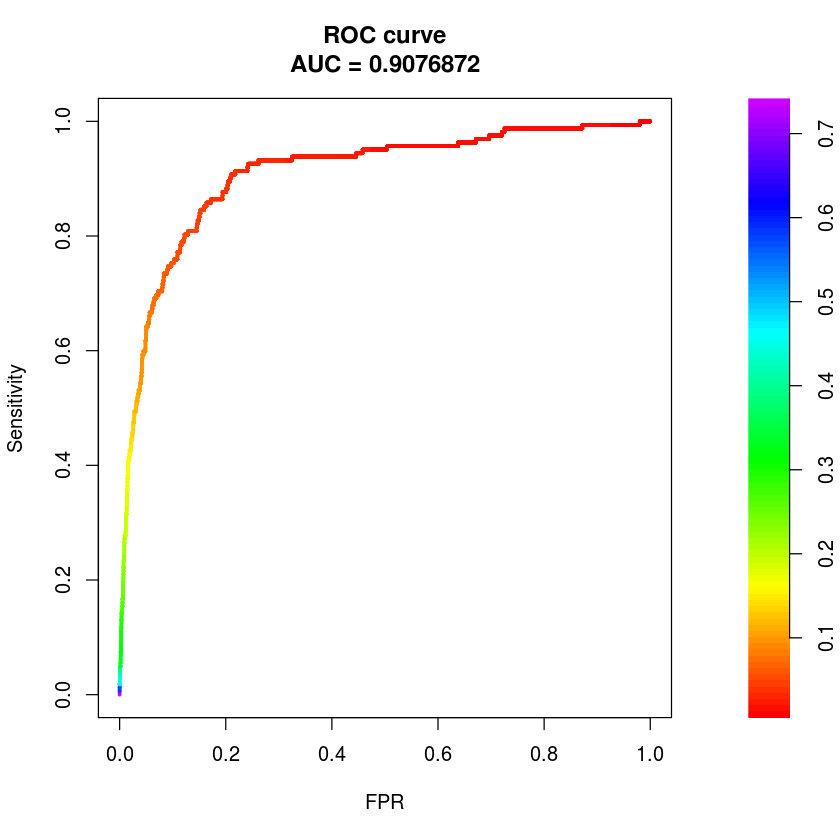

In [7]:
plot(roc)

In [8]:
roc$auc

[1] 0.9076872

In [9]:
write(sprintf("auc_roc:%s", roc$auc), file = "cval_scores.txt")

## Precision Recall curve

In [10]:
pr <- pr.curve(scores.class0 = good, scores.class1 = bad, curve = T)

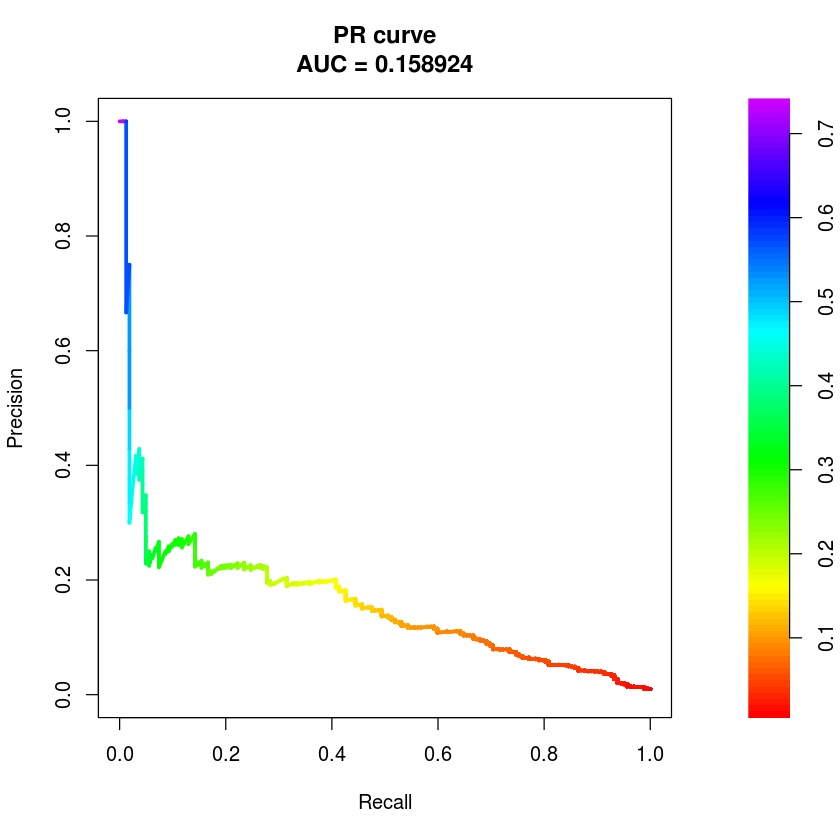

In [11]:
plot(pr)

In [12]:
pr$auc.integral

[1] 0.158924

In [13]:
write(sprintf("auc_pr:%s", pr$auc.integral), file = "cval_scores.txt", append = T)